

# Deep Learning Fundamentals - Logistic Regression

Download the data from UCI ML Repository. [Click here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) for bank note authentication dataset description.

In [1]:
import urllib.request

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt',
                          'banknote.csv')

('banknote.csv', <http.client.HTTPMessage at 0x7fb461bd84e0>)

Import libraries

In [0]:
import numpy as np
import pandas as pd
import helpers.plt

from logistic_regression import LogisticModel

Import the downloaded data

In [3]:
df = pd.read_csv('banknote.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Extract features and labels as numpy arrays

In [0]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

Shuffle and normalize data

In [5]:
total_examples = X.shape[0]
print('Found', total_examples, 'total examples.')

# Shuffle dataset
indices = np.random.randint(0, total_examples, total_examples)
X = X[indices]
Y = Y[indices]

# Normalize data
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

Found 1372 total examples.


Split dataset into training and test sets

In [0]:
X_train = X[:1000]
Y_train = Y[:1000]
X_test = X[1000:]
Y_test = Y[1000:]

Create a function to generate random mini batch. It should confirm to how the train function in the logistic model works. Therefore, it should accept `(X, Y, batch_size)` in that order and return `(X_batch, Y_batch)`.

In [0]:
def generate_batch(X, Y, batch_size):
    num_total = X.shape[0]
    X_batch = np.zeros((batch_size, 4))
    Y_batch = np.zeros((batch_size, 1))
    indices = np.random.randint(0, num_total, batch_size)
    
    for i, index in enumerate(indices):
        X_batch[i] = X[index]
        Y_batch[i] = Y[index]
    
    return X_batch, Y_batch

Create a LogisticModel and evaluate the untrained model.

In [8]:
model = LogisticModel(num_features=4)
model.summary()

print('Initial values for W and b:')
print('W =', list(np.squeeze(model.W)))
print('b =', np.squeeze(model.b))

X, Y = generate_batch(X_test, Y_test, 100)
acc, loss = model.evaluate(X, Y)
print('Untrained model accuracy:', 100*acc)

Number of features: 4
Shape of weights: (4, 1)
Shape of biases: (1, 1)
Initial values for W and b:
W = [-1.1759673282185605, 0.2546291160954224, 0.08435321932122591, 0.21975563216793176]
b = 0.0
Untrained model accuracy: 83.0


Train the model and evaluate accuracy again.

In [9]:
model.train(
    batch_size=100,
    get_batch=generate_batch,
    lr=10.0,
    iterations=10,
    X_train=X_train, Y_train=Y_train,
    X_test=X_test, Y_test=Y_test
)

X, Y = generate_batch(X_test, Y_test, 100)
acc, loss = model.evaluate(X, Y)
print('Trained model accuracy:', 100*acc)

Training..
Iter: 0, Val Acc: 0.910, Val Loss: 0.224
Iter: 1, Val Acc: 0.980, Val Loss: 0.149
Iter: 2, Val Acc: 0.910, Val Loss: 0.159
Iter: 3, Val Acc: 0.960, Val Loss: 0.115
Iter: 4, Val Acc: 0.970, Val Loss: 0.102
Iter: 5, Val Acc: 0.990, Val Loss: 0.065
Iter: 6, Val Acc: 0.990, Val Loss: 0.062
Iter: 7, Val Acc: 0.990, Val Loss: 0.071
Iter: 8, Val Acc: 0.940, Val Loss: 0.099
Iter: 9, Val Acc: 0.990, Val Loss: 0.064
Training finished.
Trained model accuracy: 98.0


Plot the validation accuracy and loss during training.

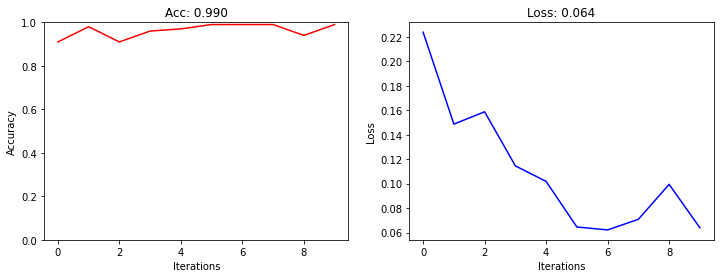

In [10]:
helpers.plt.plot_metrics(model)

In [11]:
print('Learned values for W and b:')
print('W =', list(np.squeeze(model.W)))
print('b =', np.squeeze(model.b))

Learned values for W and b:
W = [-3.416600164656916, -3.3705326907799886, -3.048728288625524, 0.05465216442737575]
b = -0.7377137526645058
